# Getting Started With Neural Networks
### This chapter covers
- Core components of neural networks
- An introduction to Keras
- Setting up a deep-learning workstation
- Using neural networks to solve basic classification and regression problems

In [0]:
import os
import numpy as np
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Classifying movie reviews: a binary classification sample

## The IMDB dataset

In [0]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [0]:
print("Train data: ", train_data[0])
print("Train labels: ", train_labels[0])

Train data:  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Train labels:  1


In [0]:
max_index = max([max(sequence) for sequence in train_data])
print("Max word index: ", max_index)

Max word index:  9999


In [0]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [0]:
print("Decoded Review: \n", decoded_review)

Decoded Review: 
 ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have 

In [0]:
max_len = max([len(sequence) for sequence in train_data])
min_len = min([len(sequence) for sequence in train_data])
print("Sequence max length: ", max_len)
print("Sequence min length: ", min_len)

Sequence max length:  2494
Sequence min length:  11


## Encoding the integer sequence into a binary matrix

In [0]:
def vectorize_sequences(sequences, dimensions=10000):
  results = np.zeros((len(sequences), dimensions))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
# First 20 words
print("Sample train data (0): ", x_train[0][:20])
print("Sample test data (0): ", x_test[0][:20])

Sample train data (0):  [0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
Sample test data (0):  [0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0.]


In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
# First 20 labels
print("y_train: ", y_train[:20])
print("y_test: ", y_test[:20])

y_train:  [1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1.]
y_test:  [0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]


## Create a Neural Network Model

In [0]:
from keras import layers, models, optimizers, losses, metrics

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_73 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_74 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Train the Neural Network Model

In [0]:
EPOCHS = 20
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=EPOCHS,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 220us/step - loss: 0.5048 - binary_accuracy: 0.7872 - val_loss: 0.3775 - val_binary_accuracy: 0.8705
Epoch 2/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.2991 - binary_accuracy: 0.9048 - val_loss: 0.3001 - val_binary_accuracy: 0.8898
Epoch 3/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.2173 - binary_accuracy: 0.9282 - val_loss: 0.3083 - val_binary_accuracy: 0.8716
Epoch 4/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.1747 - binary_accuracy: 0.9437 - val_loss: 0.2826 - val_binary_accuracy: 0.8845
Epoch 5/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.1421 - binary_accuracy: 0.9539 - val_loss: 0.2856 - val_binary_accuracy: 0.8858
Epoch 6/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.1147 - binary_accuracy: 0.9652 - val_loss: 0.3147 - val_bi

## Plot the training and validation loss

In [0]:
history_dict = history.history
print("History keys: ", history_dict.keys())

History keys:  dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])


In [0]:
import matplotlib.pyplot as plt

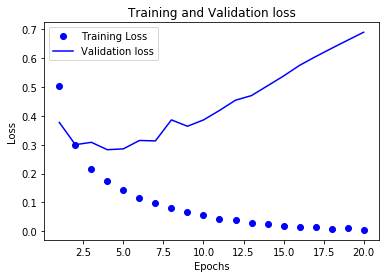

In [0]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, EPOCHS+1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation loss")
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

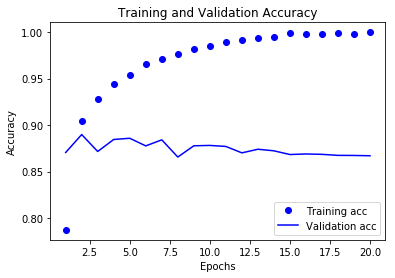

In [0]:
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo', label="Training acc")
plt.plot(epochs, val_acc_values, 'b', label="Validation acc")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_76 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [0]:
EPOCHS2 = 4
history = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=EPOCHS2,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 3s 215us/step - loss: 0.5341 - binary_accuracy: 0.7896 - val_loss: 0.4088 - val_binary_accuracy: 0.8686
Epoch 2/4
15000/15000 [==============================] - 2s 148us/step - loss: 0.3276 - binary_accuracy: 0.8988 - val_loss: 0.3164 - val_binary_accuracy: 0.8845
Epoch 3/4
15000/15000 [==============================] - 2s 147us/step - loss: 0.2369 - binary_accuracy: 0.9245 - val_loss: 0.2832 - val_binary_accuracy: 0.8894
Epoch 4/4
15000/15000 [==============================] - 2s 146us/step - loss: 0.1876 - binary_accuracy: 0.9388 - val_loss: 0.2861 - val_binary_accuracy: 0.8839


In [0]:
results2 = model2.evaluate(x_test, y_test)
print("Results(2): ", results2)

25000/25000 [==============================] - 2s 81us/step
Results(2):  [0.3011617387199402, 0.87704]


In [0]:
model2.predict(x_test)

array([[0.33981472],
       [0.9996284 ],
       [0.9350536 ],
       ...,
       [0.14490548],
       [0.18981212],
       [0.6441573 ]], dtype=float32)

## Experimentation

1. Add one more layer (from 2 hidden layers to **three hidden layers**)

In [0]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(16, activation='relu'))
model3.add(layers.Dense(16, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))
model3.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [0]:
EPOCHS = 5
history = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=EPOCHS,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 4s 247us/step - loss: 0.5336 - binary_accuracy: 0.7659 - val_loss: 0.3932 - val_binary_accuracy: 0.8623
Epoch 2/5
15000/15000 [==============================] - 2s 148us/step - loss: 0.3080 - binary_accuracy: 0.8985 - val_loss: 0.3130 - val_binary_accuracy: 0.8779
Epoch 3/5
15000/15000 [==============================] - 2s 148us/step - loss: 0.2197 - binary_accuracy: 0.9259 - val_loss: 0.2832 - val_binary_accuracy: 0.8864
Epoch 4/5
15000/15000 [==============================] - 2s 149us/step - loss: 0.1683 - binary_accuracy: 0.9431 - val_loss: 0.3007 - val_binary_accuracy: 0.8810
Epoch 5/5
15000/15000 [==============================] - 2s 150us/step - loss: 0.1359 - binary_accuracy: 0.9538 - val_loss: 0.3018 - val_binary_accuracy: 0.8810


In [0]:
results3 = model3.evaluate(x_test, y_test)
print("Results(3): ", results3)

25000/25000 [==============================] - 2s 91us/step
Results(3):  [0.32953017110824584, 0.87204]


## Experimentation

2. Change the number of neurons in hidden layers.

In [0]:
model4 = models.Sequential()
model4.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))
model4.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [0]:
history = model4.fit(partial_x_train,
                    partial_y_train,
                    epochs=EPOCHS,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 5s 344us/step - loss: 0.4935 - binary_accuracy: 0.7563 - val_loss: 0.3177 - val_binary_accuracy: 0.8800
Epoch 2/5
15000/15000 [==============================] - 4s 263us/step - loss: 0.2559 - binary_accuracy: 0.9040 - val_loss: 0.3946 - val_binary_accuracy: 0.8383
Epoch 3/5
15000/15000 [==============================] - 4s 258us/step - loss: 0.1878 - binary_accuracy: 0.9291 - val_loss: 0.3419 - val_binary_accuracy: 0.8696
Epoch 4/5
15000/15000 [==============================] - 4s 256us/step - loss: 0.1325 - binary_accuracy: 0.9519 - val_loss: 0.3292 - val_binary_accuracy: 0.8776
Epoch 5/5
15000/15000 [==============================] - 4s 257us/step - loss: 0.1041 - binary_accuracy: 0.9626 - val_loss: 0.3300 - val_binary_accuracy: 0.8842


In [0]:
results4 = model4.evaluate(x_test, y_test)
print("Results(4): ", results4)

25000/25000 [==============================] - 3s 140us/step
Results(4):  [0.3542418965578079, 0.87444]


In [0]:
model5 = models.Sequential()
model5.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model5.add(layers.Dense(64, activation='relu'))
model5.add(layers.Dense(1, activation='sigmoid'))
model5.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.mse,
              metrics=[metrics.binary_accuracy])

In [0]:
history = model5.fit(partial_x_train,
                    partial_y_train,
                    epochs=EPOCHS,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 5s 348us/step - loss: 0.1577 - binary_accuracy: 0.7649 - val_loss: 0.1465 - val_binary_accuracy: 0.7909
Epoch 2/5
15000/15000 [==============================] - 4s 262us/step - loss: 0.0752 - binary_accuracy: 0.9029 - val_loss: 0.0825 - val_binary_accuracy: 0.8905
Epoch 3/5
15000/15000 [==============================] - 4s 262us/step - loss: 0.0519 - binary_accuracy: 0.9351 - val_loss: 0.0832 - val_binary_accuracy: 0.8859
Epoch 4/5
15000/15000 [==============================] - 4s 265us/step - loss: 0.0371 - binary_accuracy: 0.9543 - val_loss: 0.1045 - val_binary_accuracy: 0.8623
Epoch 5/5
15000/15000 [==============================] - 4s 263us/step - loss: 0.0265 - binary_accuracy: 0.9695 - val_loss: 0.0870 - val_binary_accuracy: 0.8851


In [0]:
results5 = model5.evaluate(x_test, y_test)
print("Results(5): ", results5)

25000/25000 [==============================] - 4s 146us/step
Results(5):  [0.09286563772797585, 0.87624]


In [0]:
model6 = models.Sequential()
model6.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model6.add(layers.Dense(64, activation='tanh'))
model6.add(layers.Dense(1, activation='sigmoid'))
model6.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.mse,
              metrics=[metrics.binary_accuracy])

In [0]:
history = model6.fit(partial_x_train,
                    partial_y_train,
                    epochs=EPOCHS,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 5s 342us/step - loss: 0.1559 - binary_accuracy: 0.7725 - val_loss: 0.0904 - val_binary_accuracy: 0.8801
Epoch 2/5
15000/15000 [==============================] - 4s 254us/step - loss: 0.0728 - binary_accuracy: 0.9034 - val_loss: 0.0972 - val_binary_accuracy: 0.8684
Epoch 3/5
15000/15000 [==============================] - 4s 251us/step - loss: 0.0518 - binary_accuracy: 0.9328 - val_loss: 0.0860 - val_binary_accuracy: 0.8854
Epoch 4/5
15000/15000 [==============================] - 4s 247us/step - loss: 0.0455 - binary_accuracy: 0.9417 - val_loss: 0.0895 - val_binary_accuracy: 0.8843
Epoch 5/5
15000/15000 [==============================] - 4s 250us/step - loss: 0.0304 - binary_accuracy: 0.9623 - val_loss: 0.0957 - val_binary_accuracy: 0.8796


In [0]:
results6 = model6.evaluate(x_test, y_test)
print("Results(6): ", results6)

25000/25000 [==============================] - 4s 141us/step
Results(6):  [0.10414581754684449, 0.8686]
